In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import numpy as np

In [3]:
model = VGG16(weights='imagenet')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img_path = '/home/leshen/Downloads/_98776281_gettyimages-521697453.jpg'

In [7]:
img = image.load_img(img_path, target_size=(224, 224))

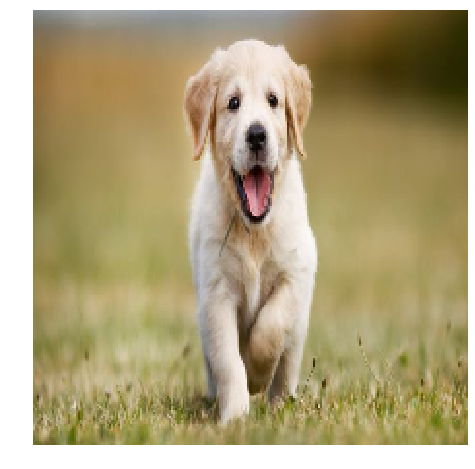

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
img = image.img_to_array(img)

In [10]:
img.shape

(224, 224, 3)

In [12]:
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

In [13]:
img.shape

(1, 224, 224, 3)

In [14]:
pred = model.predict(img)

In [17]:
from keras.applications.vgg16 import decode_predictions

In [18]:
print('Predicted', decode_predictions(pred, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted [('n02099601', 'golden_retriever', 0.703557), ('n02099712', 'Labrador_retriever', 0.18507685), ('n02111500', 'Great_Pyrenees', 0.059587087)]
